# NumPy and Pandas Tutorial
## HODP Bootcamp Week 1
### February 18, 2020

## Some Python refreshers . . . 
- datatypes (strings, integers)
- functions
- data structures like lists and dictionaries

In [12]:
lst = [1, "Emma", 5.0, {"name": "Emma", "age": 20}]

In [13]:
lst[0]

1

In [14]:
# How could we access the last element?
lst[-1]

{'name': 'Emma', 'age': 20}

In [15]:
# How could we access Emma's age?
lst[-1]['age']

20

In [16]:
for key in lst[-1].keys():
    print(key)
    print(lst[-1][key])

name
Emma
age
20


In [17]:
def generate_emails(first_name, last_name):
    address = "@college.harvard.edu"
    opt1 = first_name[0] + last_name + address
    opt2 = first_name + last_name + address
    opt3 = first_name + "_" + last_name + address
    opt4 = first_name + address
    return [opt1, opt2, opt3, opt4]

options = generate_emails("kevin", "bi")
print(options)

['kbi@college.harvard.edu', 'kevinbi@college.harvard.edu', 'kevin_bi@college.harvard.edu', 'kevin@college.harvard.edu']


## This week:
* Learn how to use Python libraries numpy and pandas to make data analysis easy and efficient
* Understand key differences between Python, NumPy, Pandas
* Practice your new data science skills!

## Getting Started

In [18]:
import numpy as np
import pandas as pd

## Python vs. NumPy
* Python lists are flexible, but bugs can be tough to find and for-loops to manipulate data can be slow
* NumPy arrays have fixed types and functions can be __vectorized__ and operations can be __broadcast__ across arrays

In [19]:
lst = ["Emma", "Jeffrey He", "Sahana", 1.0, 2] # This is a valid Python list
lst

['Emma', 'Jeffrey He', 'Sahana', 1.0, 2]

In [20]:
np_lst = np.array(lst) # Numpy forces them all to be strings
np_lst # Anyone know what this dtype refers to?

array(['Emma', 'Jeffrey He', 'Sahana', '1.0', '2'], dtype='<U10')

In [21]:
# This threw an error before! Now it's fixed. 
# lst contained elements of multiple types, including an 
# int and a float, but to be concatenated and printed with
# the string of 4, they needed to be converted to strings

for elt in lst:
    print(str(elt) + " 4")

Emma 4
Jeffrey He 4
Sahana 4
1.0 4
2 4


In [22]:
for elt in np_lst:
    print(elt + " is studying abroad")

Emma is studying abroad
Jeffrey He is studying abroad
Sahana is studying abroad
1.0 is studying abroad
2 is studying abroad


## Creating NumPy arrays

First, we can use ``np.array`` to create arrays from Python lists:

In [23]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [24]:
np.array([3.14, 4, 2, 3]) # Notice how the elements in the resulting array are all floats

array([3.14, 4.  , 2.  , 3.  ])

In [25]:
np.array([1, 2, 3, 4], dtype='float32') # You can explicitly set the type with the dtype keyword

array([1., 2., 3., 4.], dtype=float32)

Numpy has a bunch of handy built-in functions to generate arrays:

In [26]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# Create an array by specifying start and stop values and the spacing between values
np.arange(0, 30, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [28]:
# Create a matrix filled with a specific value
np.full((2, 4), 9.9)

array([[9.9, 9.9, 9.9, 9.9],
       [9.9, 9.9, 9.9, 9.9]])

In [29]:
array = np.arange(9).reshape(3,3)
array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

We can slice NumPy arrays and index into them using bracket notation:

In [30]:
array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
# How do I extract the first element
array[0, 1]

1

In [32]:
array[:, 2]

array([2, 5, 8])

In [33]:
# How could I extract the second row?
array[1, :]

array([3, 4, 5])

## Rule of Thumb: Don't reinvent the wheel
Google if a function already exists that does what you want

## So, how is this useful for data analysis?

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the __mean__ and __standard deviation__, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

In [34]:
big_array = np.random.rand(1000000)

# -n 10 means run it 10 times
%timeit -n 10 sum(big_array)
%timeit -n 10 np.sum(big_array)

129 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
490 µs ± 203 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Some more handy features of NumPy:

One common type of aggregation operation is an aggregate along a row or column.

Say you have some data stored in a two-dimensional array:

In [35]:
M = np.random.random((3, 4))
print(M)

[[0.49227837 0.572945   0.37101729 0.23918532]
 [0.92481664 0.21836725 0.09027232 0.04073423]
 [0.6984689  0.76177498 0.98167261 0.73301052]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [36]:
M.min()

0.04073423315023972

But what if you want the min for each row or each column?

In [37]:
# min of each column
M.min(axis=0)

array([0.49227837, 0.21836725, 0.09027232, 0.04073423])

In [38]:
# So how would I get the max of each row?
M.min(axis=1)

array([0.23918532, 0.04073423, 0.6984689 ])

### Other aggregation functions

Most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special floating-point ``NaN`` value.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |
| ``np.concatenate``| N/A                 | Concatenate arrays (without manual copying!)  |

## Pandas

* Pandas is another useful library for data analysis.
* While NumPy is really useful for math, it relies on __arrays__ of specific datatypes (ints, floats, etc).
* Pandas uses two data structures: `Series` and `DataFrame` that are designed to package lots of different types of data similar to a spreadsheet.
* It combines the functionality of Python and NumPy with the ease of use of Google Sheets.

In [39]:
# Creating and summarizing a data frame

states = pd.DataFrame({'State':['Massachusetts','Ohio','Alaska','California','Arkansas'],
                     'Population Rank':[15, 7, 48, 1, 33]})
states

,State,Population Rank
0,Massachusetts,15
1,Ohio,7
2,Alaska,48
3,California,1
4,Arkansas,33


In [40]:
states.describe()

,Population Rank
count,5.000000
mean,20.800000
std,19.395876
min,1.000000
25%,7.000000
50%,15.000000
75%,33.000000
max,48.000000


## Example: House Rankings

We will:
1. Read in the data
2. Manipulate the data into a more useable form
3. Analyze the data
4. Plot our results

### Reading in the data

It's super easy to use Pandas to read in data from csv files:

In [41]:
rankings = pd.read_csv("house_rankings_2019.csv")
rankings.head()

,House,1,2,3,4,5,6,7,8,9,10,11,12
0,Adams,7,14,19,19,30,20,19,19,24,7,12,13
1,Cabot,0,3,5,3,7,1,9,8,15,39,52,61
2,Dunster,11,22,45,29,16,25,17,14,10,4,7,3
3,Pforzheimer,3,6,7,6,9,11,8,17,26,61,35,14
4,Winthrop,27,91,23,19,12,7,4,8,3,3,1,5


And it looks beautiful:

In [42]:
rankings.set_index("House", inplace=True)
rankings

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Adams,7,14,19,19,30,20,19,19,24,7,12,13
Cabot,0,3,5,3,7,1,9,8,15,39,52,61
Dunster,11,22,45,29,16,25,17,14,10,4,7,3
Pforzheimer,3,6,7,6,9,11,8,17,26,61,35,14
Winthrop,27,91,23,19,12,7,4,8,3,3,1,5
Kirkland,5,5,11,23,20,30,25,28,20,9,12,15
Quincy,5,8,26,29,30,28,27,22,13,5,5,5
Lowell,118,28,19,12,6,10,4,2,3,1,0,0
Mather,9,6,5,16,19,8,19,24,45,21,8,23


### Manipulating the data

It may be useful to also have this data in a NumPy array so we can use some of the NumPy aggregate functions to analyze our data (although Pandas also has its own version of these functions).  It's easy to convert between types:

In [43]:
rankings.values

array([[  7,  14,  19,  19,  30,  20,  19,  19,  24,   7,  12,  13],
       [  0,   3,   5,   3,   7,   1,   9,   8,  15,  39,  52,  61],
       [ 11,  22,  45,  29,  16,  25,  17,  14,  10,   4,   7,   3],
       [  3,   6,   7,   6,   9,  11,   8,  17,  26,  61,  35,  14],
       [ 27,  91,  23,  19,  12,   7,   4,   8,   3,   3,   1,   5],
       [  5,   5,  11,  23,  20,  30,  25,  28,  20,   9,  12,  15],
       [  5,   8,  26,  29,  30,  28,  27,  22,  13,   5,   5,   5],
       [118,  28,  19,  12,   6,  10,   4,   2,   3,   1,   0,   0],
       [  9,   6,   5,  16,  19,   8,  19,  24,  45,  21,   8,  23],
       [ 15,  12,  28,  32,  28,  24,  21,  17,   8,   8,   8,   2],
       [  3,   5,  12,  13,  21,  30,  44,  35,  15,   7,  10,   8],
       [  0,   3,   3,   2,   5,   9,   6,   9,  21,  38,  53,  54]])

We can also splice this array to just get the values for the first column or row:

In [44]:
# How could I get the number of first-place votes from each House?
rankings.values[:, 0]

array([  7,   0,  11,   3,  27,   5,   5, 118,   9,  15,   3,   0])

In [45]:
# How could I get the number of votes at each ranking level just for Adams?
rankings.values[0, :]

array([ 7, 14, 19, 19, 30, 20, 19, 19, 24,  7, 12, 13])

We can rename data labels pretty easily:

In [46]:
rankings.rename(index = {'Pforzheimer':'Pfoho'})

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Adams,7,14,19,19,30,20,19,19,24,7,12,13
Cabot,0,3,5,3,7,1,9,8,15,39,52,61
Dunster,11,22,45,29,16,25,17,14,10,4,7,3
Pfoho,3,6,7,6,9,11,8,17,26,61,35,14
Winthrop,27,91,23,19,12,7,4,8,3,3,1,5
Kirkland,5,5,11,23,20,30,25,28,20,9,12,15
Quincy,5,8,26,29,30,28,27,22,13,5,5,5
Lowell,118,28,19,12,6,10,4,2,3,1,0,0
Mather,9,6,5,16,19,8,19,24,45,21,8,23


### Analyzing the data

In [47]:
rankings.describe() # This is not super insightful

,1,2,3,4,5,6,7,8,9,10,11,12
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667,16.916667
std,32.701010,24.603985,12.339577,10.184287,9.258493,10.299676,11.758620,9.452833,11.618624,19.038040,18.817102,20.110867
min,0.000000,3.000000,3.000000,2.000000,5.000000,1.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000
25%,3.000000,5.000000,6.500000,10.500000,8.500000,8.750000,7.500000,8.750000,9.500000,4.750000,6.500000,4.500000
50%,6.000000,7.000000,15.500000,17.500000,17.500000,15.500000,18.000000,17.000000,15.000000,7.500000,9.000000,10.500000
75%,12.000000,16.000000,23.750000,24.500000,22.750000,25.750000,22.000000,22.500000,21.750000,25.250000,17.750000,17.000000
max,118.000000,91.000000,45.000000,32.000000,30.000000,30.000000,44.000000,35.000000,45.000000,61.000000,53.000000,61.000000


 #### First, how many students filled out the survey?

In [48]:
n = rankings.sum(axis=1)[0] # Axis=1 specifies analysis along rows, [0] specifies sum of only the first row
print(n)

203


#### Which house was the most popular? The least popular?

In [49]:
rankings.iloc[:, 0].idxmax()
# iloc allows us to extract rows/cols when our data labes aren't [0... n]
# idmax gives us the "index" (data label) of the max value in the column we're lokoing at (first-palce votes)

'Lowell'

In [50]:
# How would I find the least popular?
# One way is to see who got the most number of last-place votes
rankings.iloc[:, 11].idxmax()

'Cabot'

#### Can we sort by popularity?

In [51]:
rankings.sort_values(by='1',ascending=False)

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Lowell,118,28,19,12,6,10,4,2,3,1,0,0
Winthrop,27,91,23,19,12,7,4,8,3,3,1,5
Eliot,15,12,28,32,28,24,21,17,8,8,8,2
Dunster,11,22,45,29,16,25,17,14,10,4,7,3
Mather,9,6,5,16,19,8,19,24,45,21,8,23
Adams,7,14,19,19,30,20,19,19,24,7,12,13
Kirkland,5,5,11,23,20,30,25,28,20,9,12,15
Quincy,5,8,26,29,30,28,27,22,13,5,5,5
Pforzheimer,3,6,7,6,9,11,8,17,26,61,35,14


#### How could we make a `DataFrame` with the percentage of first place rankings for each house?

In [52]:
# write code for first place percentages here
rankings.iloc[:,0] / n * 100

House
Adams           3.448276
Cabot           0.000000
Dunster         5.418719
Pforzheimer     1.477833
Winthrop       13.300493
Kirkland        2.463054
Quincy          2.463054
Lowell         58.128079
Mather          4.433498
Eliot           7.389163
Leverett        1.477833
Currier         0.000000
Name: 1, dtype: float64

#### How could we make a `DataFrame` with the average ranking for each house? 

In [53]:
avg = np.zeros(12)
w_rankings = rankings.copy()
for i in range(0,12):
    w_rankings.iloc[:,i] = rankings.iloc[:,i] * (i+1)
avg_rankings = w_rankings.sum(axis=1) / n
avg_rankings

House
Adams           6.389163
Cabot          10.000000
Dunster         4.975369
Pforzheimer     8.669951
Winthrop        3.330049
Kirkland        6.901478
Quincy          5.812808
Lowell          2.216749
Mather          7.620690
Eliot           5.330049
Leverett        6.822660
Currier         9.931034
dtype: float64

In [58]:
avg_rankings = avg_rankings.sort_values()
avg_rankings

House
Lowell          2.216749
Winthrop        3.330049
Dunster         4.975369
Eliot           5.330049
Quincy          5.812808
Adams           6.389163
Leverett        6.822660
Kirkland        6.901478
Mather          7.620690
Pforzheimer     8.669951
Currier         9.931034
Cabot          10.000000
dtype: float64

In [61]:
# how might we find the average renovated-house ranking? average quad house ranking
sum(avg_rankings[0:3])/3
sum(avg_rankings[9:12])/3

9.533661740558292

In [62]:
import matplotlib.pyplot as plt
import matplotlib

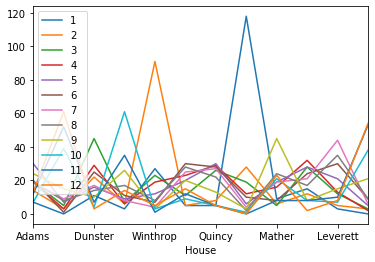

In [63]:
rankings.plot()

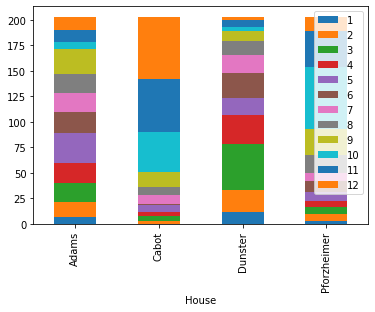

In [64]:
rankings[0:4].plot.bar(stacked=True);


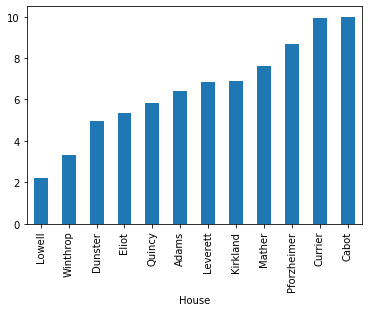

In [65]:
avg_rankings.plot.bar()

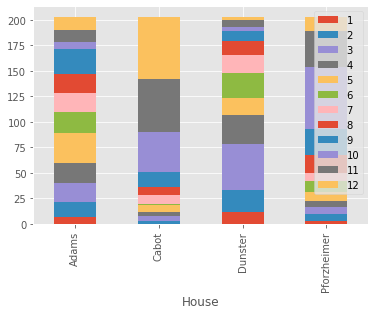

In [66]:
matplotlib.style.use('ggplot')
rankings[0:4].plot.bar(stacked=True);

In [ ]:
avg_rankings.plot.bar()